# STEAP

This notebook shows how the figures were made.

#### Imports

In [1]:
# quick/dirty method to allow importing by changing working directory
import os
os.chdir("../")
os.getcwd()

'/home/eerdem/STEAP'

In [2]:
import pandas as pd
import constants # all constants used here can be found and edited in the constants.py file
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# from scripts import convert_output_to_dataframe
# from scripts import gene_set_enrichment_analysis
# from scripts import calculate_beta_correlation
# from scripts import calculate_es_correlation
from scripts import upsetplot
# from scripts import circosplot

In [13]:
figure_dir = 'figures_and_tables/'

In [4]:
methods = constants.METHODS
pval_correction = constants.PVAL_CORRECTION
gwas_group_dict = constants.GWAS_GROUP_DICT

In [5]:
df_all = pd.read_hdf('data/CELLECT_output/data.h5', 'df_all')
corr_df = pd.read_hdf('data/CELLECT_output/data.h5', 'corr_df')
es_corr_df = pd.read_hdf('data/CELLECT_output/data.h5', 'es_corr_df')
display(df_all)
display(corr_df)
display(es_corr_df)

,gwas,specificity_id,annotation,beta,beta_se,pvalue,method,n_methods,pvalue_bonferroni
0,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_CTXN3,-0.174645,0.089013,0.975106,H-MAGMA,3,1.0
1,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_LAMP5,-0.123540,0.071732,0.957472,H-MAGMA,3,1.0
2,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_NTRK1,-0.269440,0.088436,0.998840,H-MAGMA,3,1.0
3,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_TRPC4,-0.246886,0.099982,0.993223,H-MAGMA,3,1.0
4,AD_JANSENS2019,Allen_human_LGN,Glutamatergic.LGN_Exc_BTNL9,-0.421298,0.133637,0.999188,H-MAGMA,3,1.0
...,...,...,...,...,...,...,...,...,...
879625,volume: thalamus,tabula_muris,Tongue.keratinocyte,-0.035636,0.045386,0.783817,MAGMA,3,1.0
879626,volume: thalamus,tabula_muris,Trachea.blood_cell,-0.102483,0.059198,0.958279,MAGMA,3,1.0
879627,volume: thalamus,tabula_muris,Trachea.endothelial_cell,-0.114722,0.055573,0.980498,MAGMA,3,1.0
879628,volume: thalamus,tabula_muris,Trachea.epithelial_cell,-0.102770,0.052743,0.974312,MAGMA,3,1.0


,gwasx,gwasy,corr,pval,method
0,AD_JANSENS2019,ASD_2019,-0.220065,2.278355e-07,H-MAGMA
1,AD_JANSENS2019,BIP_PGC3,-0.122407,4.318468e-03,H-MAGMA
2,AD_JANSENS2019,BMI_GIANT2018,-0.007513,8.614700e-01,H-MAGMA
3,AD_JANSENS2019,DTI AD: ACR,0.247713,5.065423e-09,H-MAGMA
4,AD_JANSENS2019,DTI AD: ALIC,0.234532,3.299649e-08,H-MAGMA
...,...,...,...,...,...
144448,volume: caudate,volume: putamen,0.337825,6.184427e-16,MAGMA
144449,volume: caudate,volume: thalamus,0.351890,3.040520e-17,MAGMA
144450,volume: pallidum,volume: putamen,0.256756,1.313908e-09,MAGMA
144451,volume: pallidum,volume: thalamus,0.310798,1.330849e-13,MAGMA


,celltypex,celltypey,corr,pval,pval_bonferroni
0,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_LAMP5",0.155456,3.503827e-15,5.194074e-10
1,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_NTRK1",0.360667,1.160120e-115,1.719762e-110
2,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_TRPC4",0.209286,6.473715e-26,9.596634e-21
3,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, Glutamatergic.LGN_Exc_BTNL9",0.159302,1.347408e-09,1.997397e-04
4,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, Glutamatergic.LGN_Exc_PRKCG_BCHE",0.246957,1.938275e-24,2.873299e-19
...,...,...,...,...,...
148235,"tabula_muris, Trachea.blood_cell","tabula_muris, Trachea.epithelial_cell",0.079243,1.409471e-02,1.000000e+00
148236,"tabula_muris, Trachea.blood_cell","tabula_muris, Trachea.mesenchymal_cell",0.111152,1.375545e-07,2.039108e-02
148237,"tabula_muris, Trachea.endothelial_cell","tabula_muris, Trachea.epithelial_cell",0.089872,9.832454e-04,1.000000e+00
148238,"tabula_muris, Trachea.endothelial_cell","tabula_muris, Trachea.mesenchymal_cell",0.149082,1.478933e-18,2.192370e-13


## Figure 1

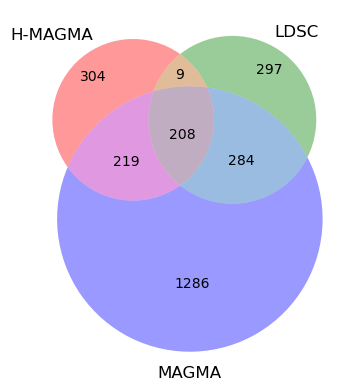

In [6]:
# venn diagram of shared significant annotations between methods
plt.style.use('default')

df_3m = df_all[(df_all['n_methods']==3)& # only get if analysed in all 3 methods
               (df_all[f'pvalue_{pval_correction}']<=0.05)] # only significant
df_3m = df_3m.groupby(['gwas','specificity_id','annotation'])['method'].agg(list).reset_index()
df_3m = df_3m['method'].value_counts().reset_index()
for m in methods:
    df_3m[m] = df_3m['index'].apply(lambda x : m in x)
df_3m.drop(columns='index', inplace=True)
# this list needs this specific order for the venn subsets
true_false_list = [
    (True,False,False),
    (False,True,False),
    (True,True,False),
    (False,False,True),
    (True,False,True),
    (False,True,True),
    (True,True,True)
]
venn_values = []
for a,b,c in true_false_list:
    venn_values.append(
        df_3m[(df_3m[methods[0]]==a)&(df_3m[methods[1]]==b)&(df_3m[methods[2]]==c)]['method'].values[0]
    )

v = venn3(subsets = venn_values, 
          set_labels = (methods))
# change the colors...
# v.get_patch_by_id('100').set_color('#4A148C')
# v.get_patch_by_id('110').set_color('#9C27B0')
# v.get_patch_by_id('010').set_color('#CE93D8')
# v.get_patch_by_id('001').set_color('#9C27B0')
# v.get_patch_by_id('011').set_color('#4A148C')
# v.get_patch_by_id('111').set_color('#')
plt.savefig(f"{figure_dir}venn_diagram.png", dpi=200, bbox_inches='tight')
plt.show()

## Figure 2

In [7]:
gwas_group_dict['Schizophrenia'] = ['SCZ_PGC3']

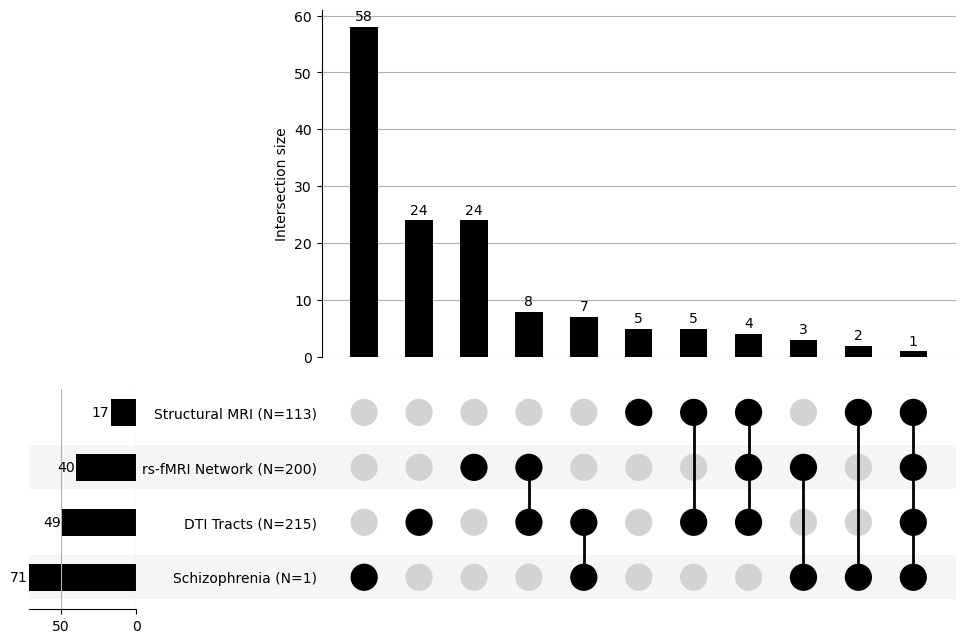

In [8]:
upsetplot.plot_upset(df_all,
                     gwas_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=56,
                     save=True, filename=f"{figure_dir}upsetplot_main.png")

## Figure 3

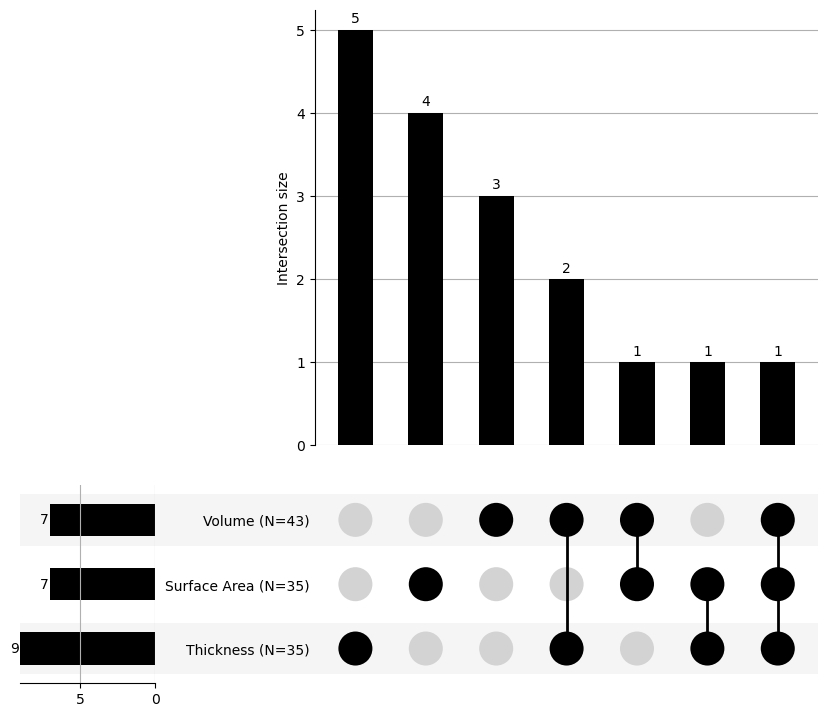

In [9]:
mri_group_dict = {
    'Volume' : ['volume'],
    'Surface Area' : ['surface area'],
    'Thickness' : ['thickness']
}
upsetplot.plot_upset(df_all, 
                     mri_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70,
                     save=True, filename=f"{figure_dir}upsetplot_structural_mri.png"
                    )

## Figure 4

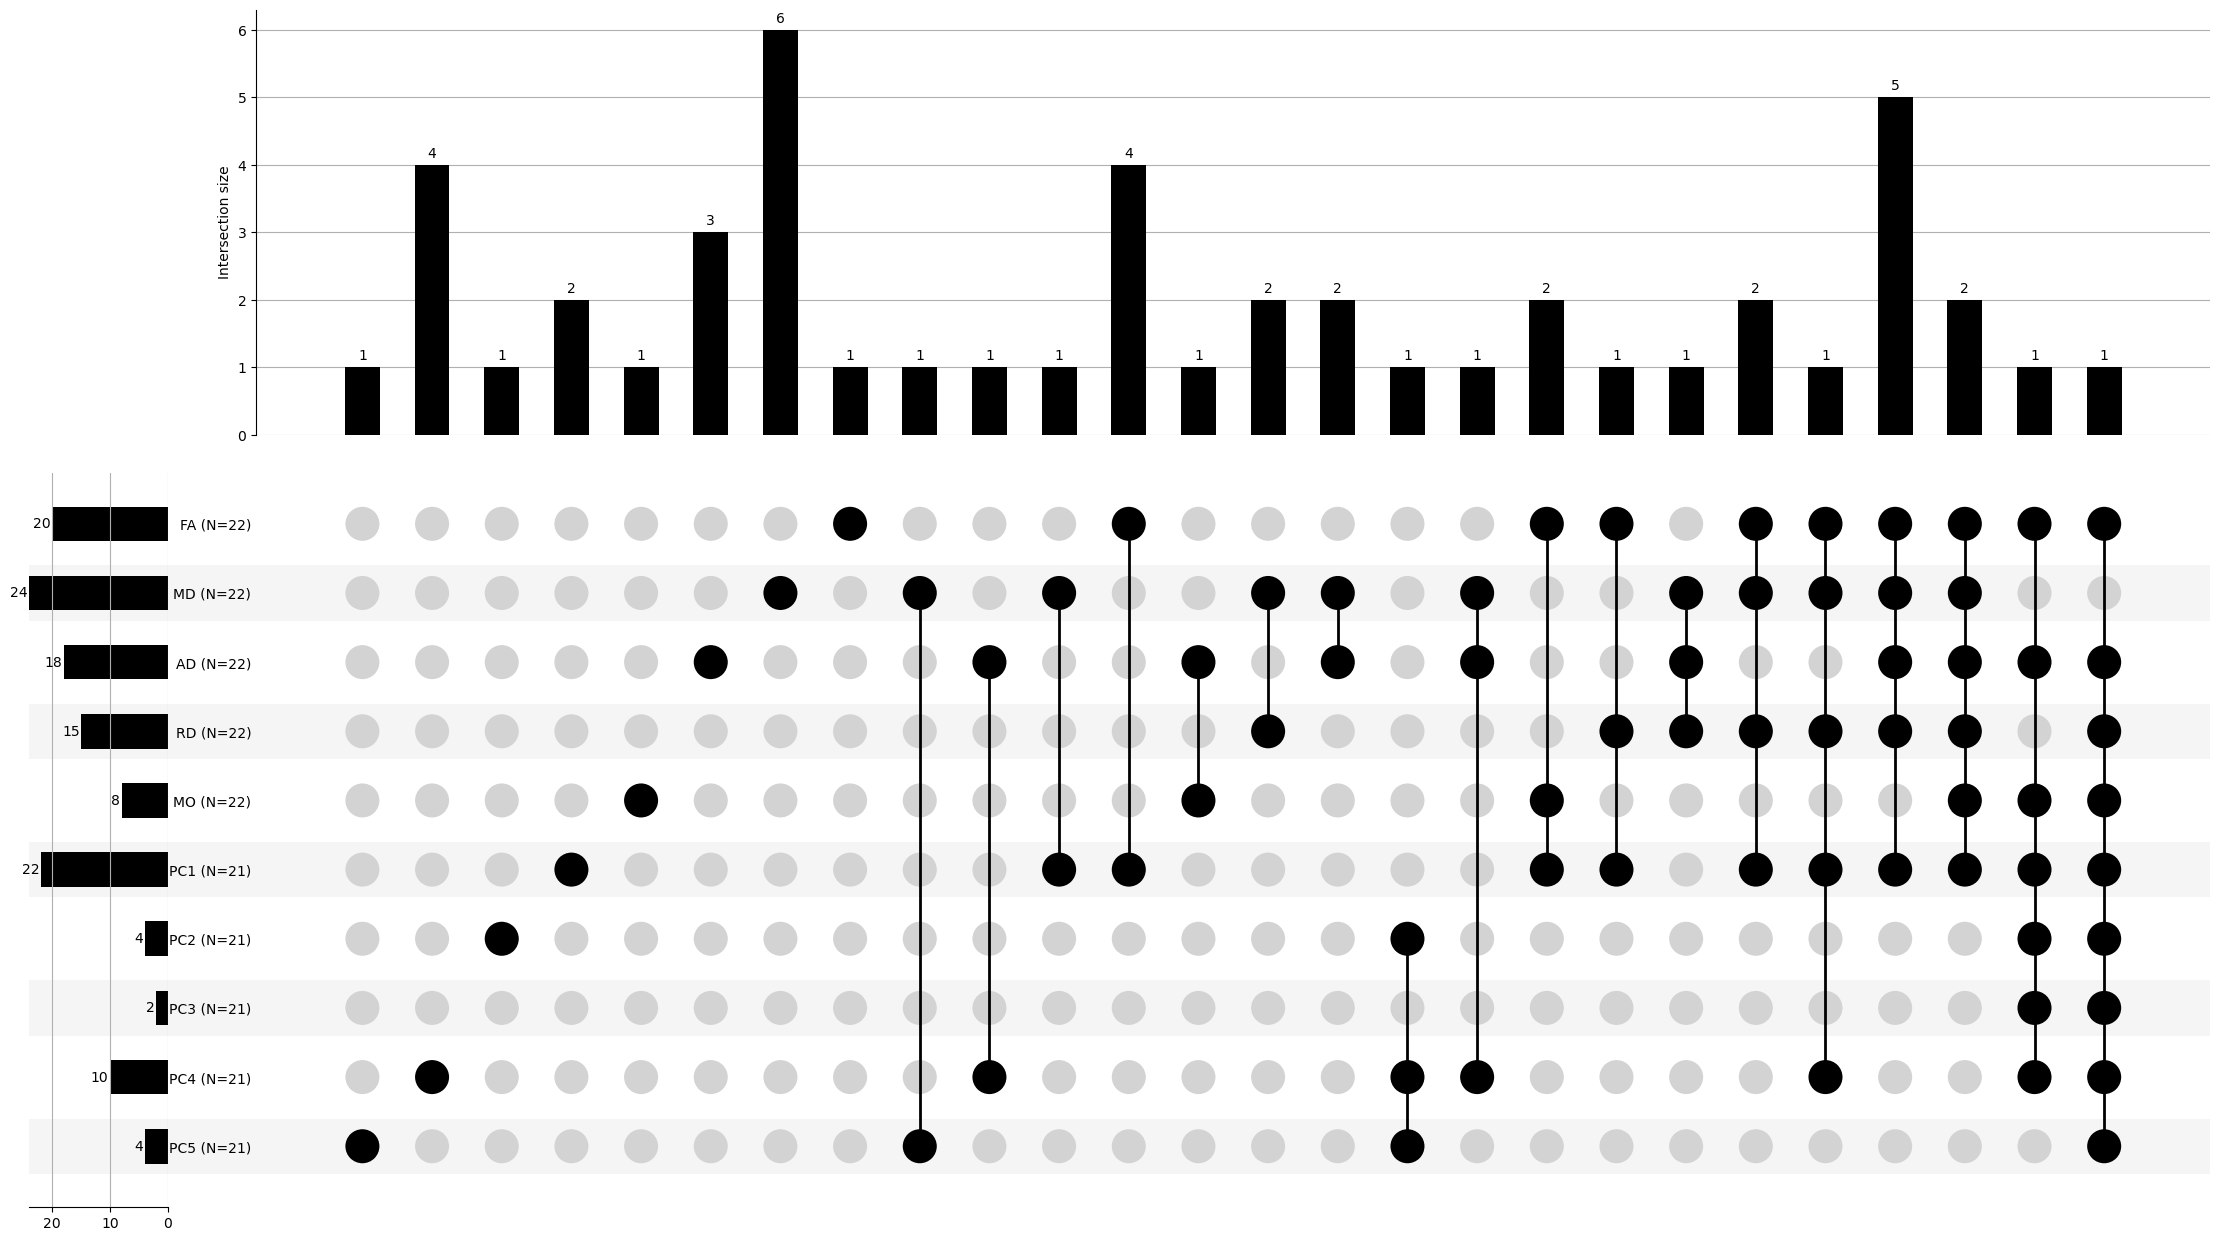

In [12]:
dti_group_dict = {
    'FA' : ['DTI FA'],
    'MD' : ['DTI MD'],
    'AD' : ['DTI AD'],
    'RD' : ['DTI RD'],
    'MO' : ['DTI MO'],
    'PC1' : ['DTI PC1'],
    'PC2' : ['DTI PC2'],
    'PC3' : ['DTI PC3'],
    'PC4' : ['DTI PC4'],
    'PC5' : ['DTI PC5'], 
}
upsetplot.plot_upset(df_all, 
                     dti_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_dti.png"
                    )

## Figure 5

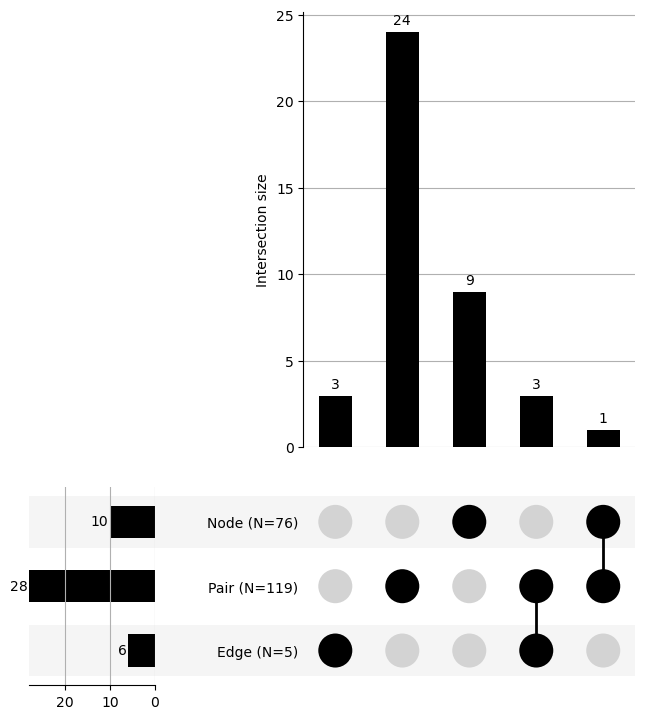

In [21]:
fmri_group_dict = {
    'Node': ['Node'],
    'Pair': ['Pair'],
    'Edge': ['Edge']
}
upsetplot.plot_upset(df_all, 
                     fmri_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_fmri.png"
                    )

In [11]:
for gwas_group,keywords in gwas_group_dict.items():
    regex_keywords = '|'.join(keywords)
    df_group = df_all[df_all['gwas'].str.contains(regex_keywords)]
    df_group_sign = df_group[(df_group[f"pvalue_{pval_correction}"]<0.05)]
    display(df_group_sign)
    break


,gwas,specificity_id,annotation,beta,beta_se,pvalue,method,n_methods,pvalue_bonferroni
695252,cortical thickness (adjusted): Cingulate.cauda...,mousebrain,SZNBL,1.578175e-01,4.433017e-02,0.000186,H-MAGMA,3,0.049293
695388,cortical thickness (adjusted): Cingulate.cauda...,tabula_muris,Marrow.megakaryocyte-erythroid_progenitor_cell,2.029148e-01,5.115313e-02,0.000037,H-MAGMA,3,0.004211
695420,cortical thickness (adjusted): Cingulate.cauda...,Allen_human_LGN,GABAergic.LGN_Inh_CTXN3,7.335209e-08,2.517007e-08,0.001783,LDSC,3,0.021392
698156,cortical thickness (adjusted): Cingulate.poste...,Allen_human_LGN,Non-Neuronal.Oligo_MAG,1.653652e-01,5.697362e-02,0.001855,H-MAGMA,3,0.022262
698757,cortical thickness (adjusted): Cingulate.poste...,Allen_human_MTG,Glutamatergic.Exc_L4-5_RORB_FOLH1B,8.045681e-08,2.448682e-08,0.000509,LDSC,3,0.038146
...,...,...,...,...,...,...,...,...,...
873732,volume: caudate,Descartes_Human_Cerebrum,Cerebrum-Excitatory_neurons,6.170242e-08,2.191557e-08,0.002435,LDSC,3,0.021918
873770,volume: caudate,GSE67835_Human_Cortex,fetal_replicating,1.312214e-07,4.929897e-08,0.003887,LDSC,3,0.034981
874055,volume: caudate,mousebrain,TEINH6,7.760119e-08,2.098564e-08,0.000109,LDSC,3,0.028813
875823,volume: pallidum,Allen_human_LGN,Non-Neuronal.Astro_LGR6,2.841504e-01,8.038718e-02,0.000205,MAGMA,3,0.002460
